In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gene-expression-bioinformatics-dataset/Spellman.csv


In [2]:
import numpy as np
import pandas as pd
import random
import keras
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
original_data = pd.read_csv("/kaggle/input/gene-expression-bioinformatics-dataset/Spellman.csv")

#as first column and first row are just to describe data we are going to slice it

data = np.array(original_data)
data = data[1:,1:]
data = data.astype(float)
data = scaler.fit_transform(data)

2025-07-01 23:38:10.817198: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751413091.009728      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751413091.066674      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
data.shape

(4380, 23)

In [4]:
data

array([[0.67177033, 0.67275748, 0.58068314, ..., 0.41527446, 0.6286201 ,
        0.50817997],
       [0.65933014, 0.68272425, 0.62661954, ..., 0.35799523, 0.62521295,
        0.49897752],
       [0.56363636, 0.61129568, 0.52414604, ..., 0.68019093, 0.52129472,
        0.37730062],
       ...,
       [0.58181818, 0.59800664, 0.50412249, ..., 0.63961814, 0.51618399,
        0.37525563],
       [0.73971292, 0.67774086, 0.55830388, ..., 0.41050119, 0.70017036,
        0.57361964],
       [0.70813397, 0.68604651, 0.56419316, ..., 0.42004773, 0.69335605,
        0.56646218]])

In [5]:
train_data, test_data = train_test_split(data, test_size =0.2)

hidden_layer = 3
original_dim = 23


input_layer = keras.Input(shape=(23,))
encoding_layer = keras.layers.Dense(hidden_layer, activation = 'relu')(input_layer)
decoding_layer = keras.layers.Dense(original_dim, activation = 'sigmoid')(encoding_layer)
auto_encoder = keras.Model(input_layer, decoding_layer)
auto_encoder.compile(optimizer='adam', loss='binary_crossentropy')
auto_encoder.fit(train_data, train_data,
            epochs=50,
            batch_size=250,
            shuffle=True,
            validation_data=(test_data,test_data)
    
)

I0000 00:00:1751413104.606884      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1751413104.607582      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Epoch 1/50


I0000 00:00:1751413106.765475      63 service.cc:148] XLA service 0x7c7ea4007730 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1751413106.765949      63 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1751413106.765968      63 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1751413106.960476      63 cuda_dnn.cc:529] Loaded cuDNN version 90300


 1/15 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - loss: 0.6931

I0000 00:00:1751413107.590079      63 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - loss: 0.6928 - val_loss: 0.6919
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6916 - val_loss: 0.6908
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6905 - val_loss: 0.6892
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6885 - val_loss: 0.6855
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6850 - val_loss: 0.6825
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6820 - val_loss: 0.6794
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6794 - val_loss: 0.6771
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6770 - val_loss: 0.6752
Epoch 9/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6751 - val_loss: 0.6736
Epoch 10/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6739 - val_loss: 0.6724
Epoch 11/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6725 - val_loss: 0.6714
Epoch 12/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6714 - val_loss: 0.6707

In [6]:
#encoder
encoder_model = keras.Model(input_layer, encoding_layer)

#decoder
encoded_input = keras.Input(shape=(3,))
decoder_layer = auto_encoder.layers[-1](encoded_input)

decoder = keras.Model(encoded_input, decoder_layer)

In [7]:
encoding_genes = encoder_model.predict(data)
print(encoding_genes)

137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
[[0.         0.9971407  0.7246928 ]
 [0.         1.0202278  0.8306215 ]
 [0.         0.9853913  0.        ]
 ...
 [0.         0.92866206 0.        ]
 [0.         1.0547912  0.8780004 ]
 [0.         0.97851163 0.9673618 ]]


In [8]:
decoding_genes = decoder.predict(encoding_genes)
print(decoding_genes)
print(decoding_genes.shape)

137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
[[0.6477973  0.6792264  0.59195507 ... 0.44234008 0.60525894 0.47230184]
 [0.6524185  0.6905835  0.6009187  ... 0.42815036 0.6185664  0.48249167]
 [0.62952006 0.6099898  0.5273503  ... 0.5456119  0.51618654 0.40174928]
 ...
 [0.624094   0.60470515 0.5281012  ... 0.5437193  0.5141763  0.40248132]
 [0.656714   0.6975919  0.6045988  ... 0.42263576 0.6252687  0.48672956]
 [0.65173393 0.6990651  0.61329085 ... 0.4076843  0.63312906 0.4966254 ]]
(4380, 23)


In [9]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [10]:
x = encoding_genes[:,0]
y = encoding_genes[:,1]
z = encoding_genes[:,2]

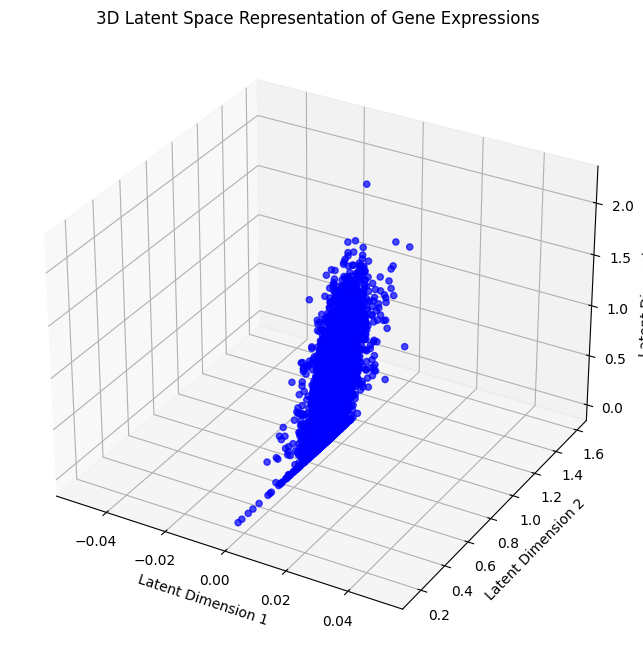

In [11]:
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(x, y, z, c='blue', marker='o', alpha=0.7)
ax.set_xlabel('Latent Dimension 1')
ax.set_ylabel('Latent Dimension 2')
ax.set_zlabel('Latent Dimension 3')
ax.set_title('3D Latent Space Representation of Gene Expressions')

plt.show()

In [12]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score as DBI
from sklearn.mixture import GaussianMixture as GMM


In [13]:
kmean_cluster = KMeans(n_clusters=3, random_state=0)
kmean_cluster.fit_predict(encoding_genes)
labels = kmean_cluster.labels_
scoring = DBI(encoding_genes, labels)
print(scoring)

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.7275465343016561


In [14]:
Gaussian_mix = GMM(n_components = 3, random_state=0).fit_predict(encoding_genes)
print(Gaussian_mix)
scores = DBI(encoding_genes, Gaussian_mix)
print(scores)

[1 1 2 ... 2 0 0]
0.7614141605264216


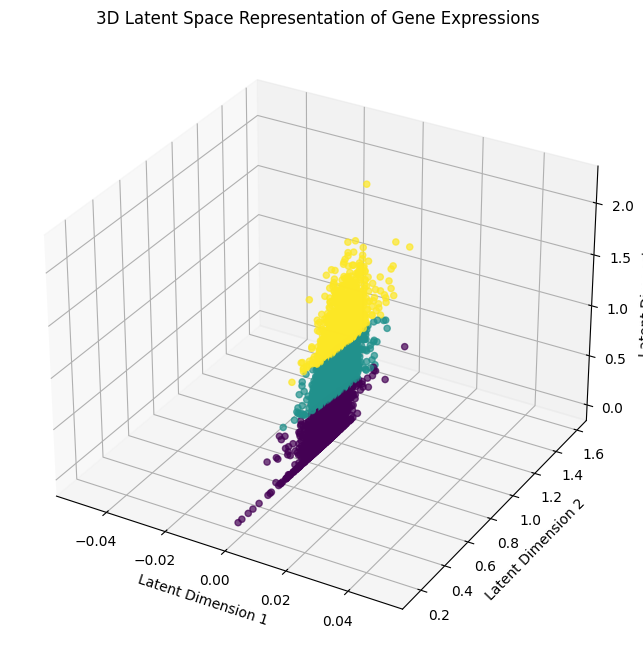

In [15]:
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(x, y, z, c=labels, cmap = 'viridis', marker='o', alpha=0.7)
ax.set_xlabel('Latent Dimension 1')
ax.set_ylabel('Latent Dimension 2')
ax.set_zlabel('Latent Dimension 3')
ax.set_title('3D Latent Space Representation of Gene Expressions')

plt.show()

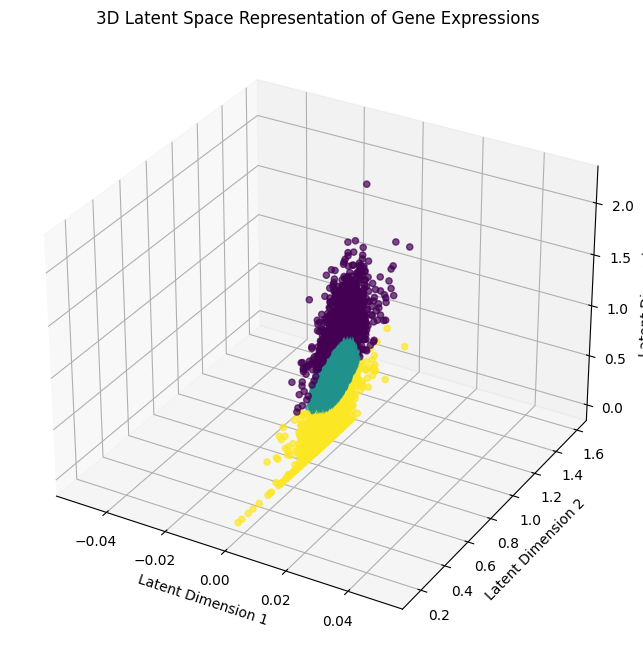

In [16]:
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(x, y, z, c=Gaussian_mix, cmap = 'viridis', marker='o', alpha=0.7)
ax.set_xlabel('Latent Dimension 1')
ax.set_ylabel('Latent Dimension 2')
ax.set_zlabel('Latent Dimension 3')
ax.set_title('3D Latent Space Representation of Gene Expressions')

plt.show()

#NEW_MODEL

In [17]:
train_data, test_data = train_test_split(data, test_size =0.3)

layer1 = 12
layer2 = 6
encoding = 3
original_dim = 23

#encoding
input_layer = keras.Input(shape=(23,))
hidden_layer1 = keras.layers.Dense(layer1, activation = 'relu')(input_layer)
hidden_layer2 = keras.layers.Dense(layer2, activation = 'relu')(hidden_layer1)
encoding_layer = keras.layers.Dense(encoding, activation = 'relu')(hidden_layer2)

#decoding
hidden_layer3 = keras.layers.Dense(layer2, activation = 'relu')(encoding_layer)
hidden_layer4 = keras.layers.Dense(layer1, activation = 'relu')(hidden_layer3)

decoding_layer = keras.layers.Dense(original_dim, activation = 'sigmoid')(hidden_layer3)
auto_encoder = keras.Model(input_layer, decoding_layer)
auto_encoder.compile(optimizer='adam', loss='mse')
auto_encoder.fit(train_data, train_data,
            epochs=20,
            batch_size=250,
            shuffle=True,
            validation_data=(test_data,test_data)
    
)

Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 131ms/step - loss: 0.0183 - val_loss: 0.0179
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0180 - val_loss: 0.0173
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0170 - val_loss: 0.0167
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0168 - val_loss: 0.0161
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0161 - val_loss: 0.0155
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0152 - val_loss: 0.0148
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0144 - val_loss: 0.0141
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0139 - val_loss: 0.0134
Epoch 9/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0133 - val_loss: 0.0127
Epoch 10/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0124 - val_loss: 0.0120
Epoch 11/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0120 - val_loss: 0.0114
Epoch 12/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0111 - val_

In [18]:
sample = test_data[10].reshape(1, -1)
sample.shape

(1, 23)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


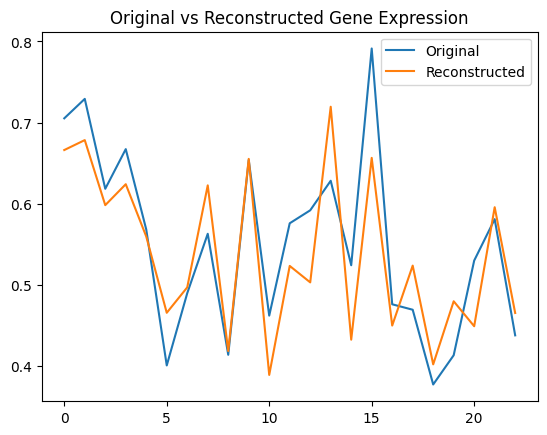

In [19]:
#testing the model with original vs reconstructed graph

import matplotlib.pyplot as plt

sample = test_data[10].reshape(1, -1)
reconstructed = auto_encoder.predict(sample)[0]

plt.plot(sample.flatten(), label='Original')
plt.plot(reconstructed, label='Reconstructed')
plt.legend()
plt.title("Original vs Reconstructed Gene Expression")
plt.show()


In [20]:
#encoders

encoder = keras.Model(inputs = input_layer, outputs = encoding_layer)
encoded_output = encoder.predict(data)


137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [21]:
kmean_cluster = KMeans(n_clusters=3, random_state=0)
kmean_cluster.fit_predict(encoded_output)
labels = kmean_cluster.labels_

scoring = DBI(encoded_output, labels)
print(scoring)

0.5736212472482948


/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [22]:
Gaussian_mix = GMM(n_components = 3, random_state=0).fit_predict(encoding_genes)
print(Gaussian_mix)
scores = DBI(encoded_output, Gaussian_mix)
print(scores)

[1 1 2 ... 2 0 0]
0.7448630030573304


In [23]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components =3, random_state=0)

tsne_pred = tsne.fit_transform(encoded_output)

tsne_pred


array([[  8.750775 , -16.745882 ,   0.       ],
       [ 16.332897 ,   4.7280846,   0.       ],
       [-33.573032 ,   4.99579  ,   0.       ],
       ...,
       [-16.228115 ,  25.01478  ,   0.       ],
       [ 28.95938  , -10.451961 ,   0.       ],
       [ 29.560637 ,   3.505196 ,   0.       ]], dtype=float32)

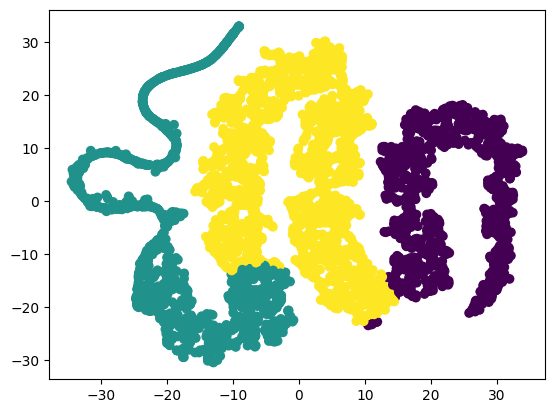

In [24]:
plt.scatter(tsne_pred[:,0], tsne_pred[:,1], c=labels)